 # 教師なし学習2:クラスタリング

In [25]:
import unittest
import doctest
import os
path = os.path.dirname(os.path.abspath(__file__))

 ## クラスタリングの概要

 ### クラスタリングとは

 ### k-means法

 ## データの前処理

 ### データの読み込み

 #### コード15-1 Wholesale.csvを読み込む

In [26]:
import pandas as pd
df = pd.read_csv(path + '/data/Wholesale.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


 ##### 各列の意味
 |列名|意味|
 |:--|:--|
 |Fresh|生鮮食品の販売数|
 |Grocery|食料雑貨品の販売数|
 |Detergents_Paper|洗剤と紙製品の販売数|
 |Channel|顧客の業態（サービス業、小売業)|
 |Milk|乳製品の販売数|
 |Frozen|冷凍食品|
 |Delicassen|惣菜の販売数|
 |Region|地域（リスボン、ポルト、その他）|

 ### 欠損値の確認

 #### コード15-2 欠損値の確認

In [27]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

 #### コード15-3 ChannelとRegionを削除

In [28]:
df = df.drop(['Channel', 'Region'], axis=1)

 ### データの標準化

 #### コード15-4 データを標準化する

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)

 ## クラスタリングの実行

 ### モジュールのインポート

 #### コード15-5 モジュールのインポート

In [30]:
from sklearn.cluster import KMeans

 ### モデルの作成

 #### コード15-6 モデルを作成

In [31]:
model = KMeans(n_clusters=3, random_state=0)

 #### コード15-7 モデルに学習させる

In [32]:
model.fit(sc_df)

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

 #### コード15-8 クラスタリングの結果を確認

In [33]:
model.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

 #### コード15-9 クラスタリングの結果を追加

In [34]:
df['cluster'] = model.labels_
df.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0


 ## 結果の評価

 ### クラスタの特徴考察

 #### コード15-10 groupbyメソッドでクラスタごとに集計する

In [35]:
df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,5591.436364,10113.027273,15637.390909,1499.918182,6711.354545,1759.090909
1,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429
2,13599.164557,3050.806962,3857.965190,3281.047468,854.620253,1168.955696


 #### コード15-11 棒グラフで表示する

<Axes: xlabel='cluster'>

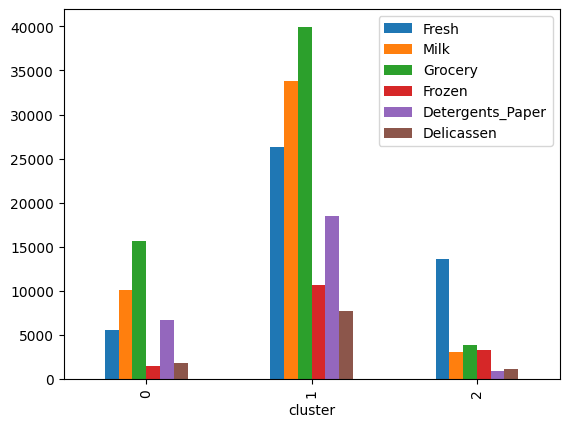

In [36]:
#%matplotlib inline
cluster_mean = df.groupby('cluster').mean()
cluster_mean.plot(kind='bar')

 ### クラスタ数の決定 ～ エルボー法

 #### コード15-12 クラスタ数2～30でSSEを調べる

In [37]:
sse_list = []
# クラスタ数2～30でSSEを調べる
for i in range(2, 31):
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(sc_df)
    sse = model.inertia_
    sse_list.append(sse)
sse_list

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value 

[1954.6477611552875,
 1614.5183504384179,
 1316.6357505603378,
 1059.1497526912442,
 917.9138975363891,
 832.6259428682437,
 740.3520805206424,
 655.0215318276073,
 605.0008013715482,
 567.3656377752586,
 516.6667130599303,
 489.1248061938426,
 454.2004057542775,
 428.4351234204059,
 415.9883199138159,
 384.425958225514,
 365.8876499481488,
 335.2386456791501,
 327.4428803637738,
 312.0959934484619,
 294.61933677400134,
 282.5280054358054,
 265.6758994877703,
 258.204895403188,
 250.33291928652503,
 240.89887772864668,
 228.27608936191518,
 219.7190538498577,
 213.87036195409112]

 #### コード15-13 折れ線グラフを描画する

<Axes: >

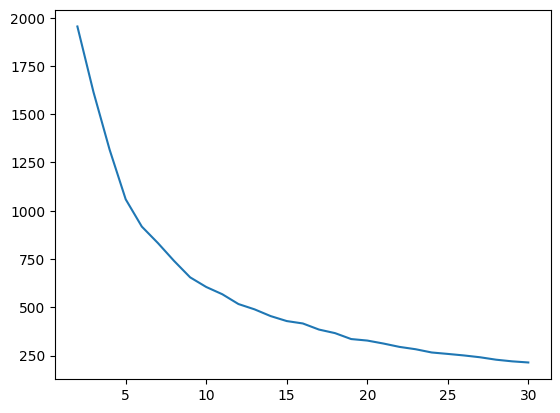

In [38]:
se = pd.Series(sse_list)
num = range(2, 31) # range関数で2～30まの整数列を作る
se.index = num # シリーズのインデックスを変更
se.plot(kind='line')

 #### コード15-14 結果をCSVファイルに書き出す

In [39]:
model = KMeans(n_clusters=5, random_state=0)
model.fit(sc_df)
df['cluster'] = model.labels_
sc_df.to_csv(path + '/data/clusterd_Wholesale.csv', index=False)

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
doctest.testmod(verbose=True)
unittest.main(argv=[''], verbosity=2, exit=False)

3 items had no tests:
    __main__
    __main__.__VSCODE_compute_hash
    __main__.__VSCODE_wrap_run_cell
0 tests in 3 items.
0 passed and 0 failed.
Test passed.



----------------------------------------------------------------------
Ran 0 tests in 0.000s

OK
